<a href="https://colab.research.google.com/github/asim5800/Bank-Marketing-Effectiveness-Prediction-/blob/main/Team_Notebook_of_Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

## **Loading Libraries & Data**

In [ ]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline

from prettytable import PrettyTable
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, log_loss, classification_report, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import NearMiss
from collections import Counter
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading Dataset
df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Bank Marketing Effectiveness Prediction - Sagar Rokad/Data/bank-full.csv',delimiter=';')

####**Analyzing Dataset**

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
#Shape of the Dataset
df.shape

(45211, 17)

#### **Information About Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### **Checking Null Values**

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

 **There is no null values in the dataset**

#### **Summary Statastics**

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Target Variable**

In [ ]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

**As We Can See that Data is highly imbalanced.**

### **List of numeric columns**

In [ ]:
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

### **List of Categorical columns**

In [ ]:
category_cols = list(df.select_dtypes(include=['object']))
category_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

# **EDA On Dataset**

#### **On Target Variable**

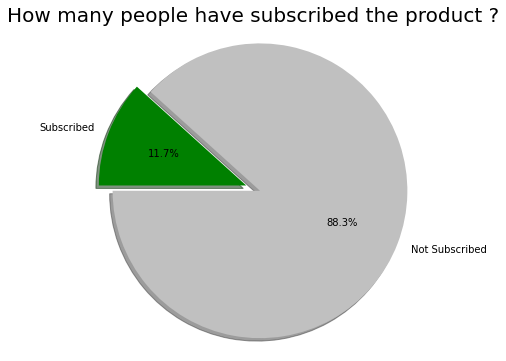

In [ ]:
#visualising how many customers have subscribed 
labels = 'Not Subscribed' , 'Subscribed'
sizes = df.y.value_counts()
colors = ['silver', 'green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("How many people have subscribed the product ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

**Only 11.7% people have subscribed to our product**

### **Bar Graph Representation of Each Variable**

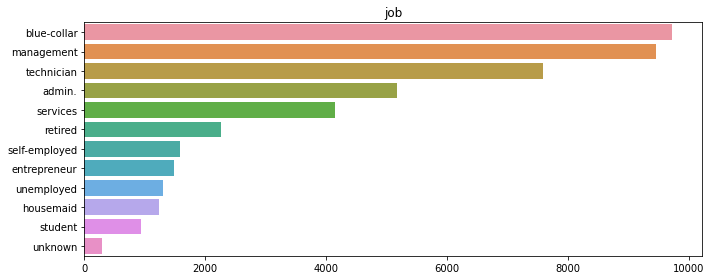

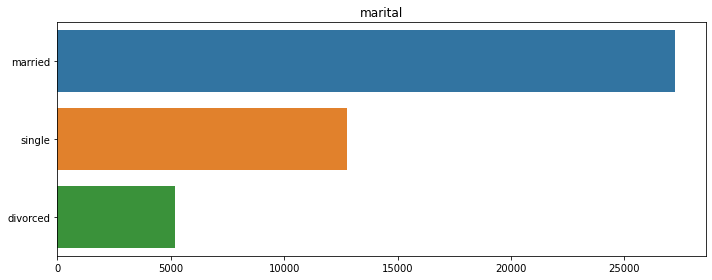

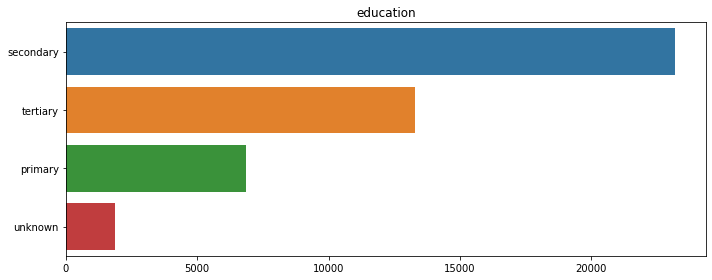

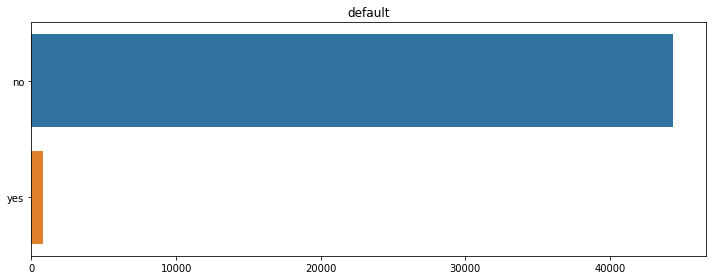

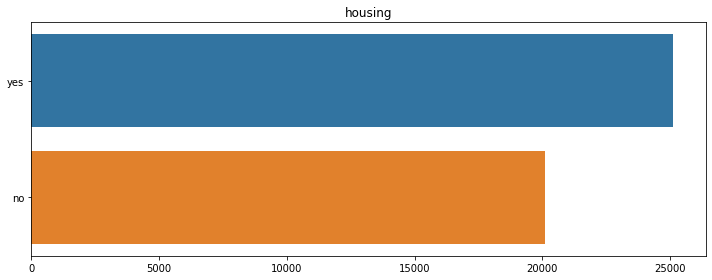

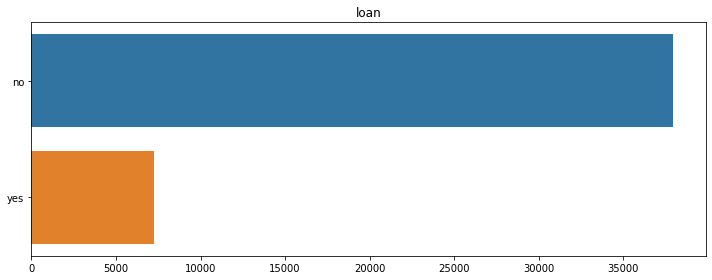

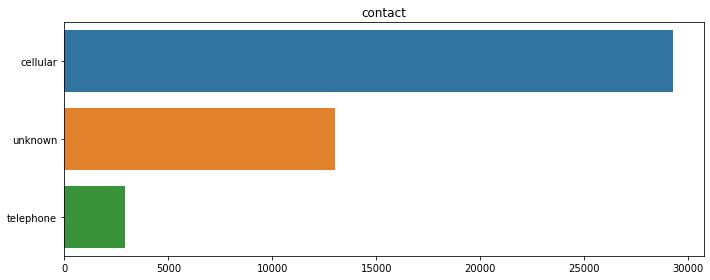

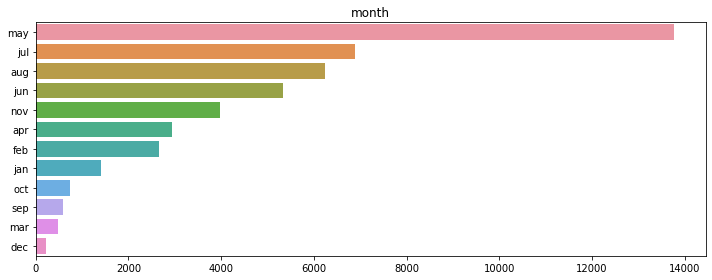

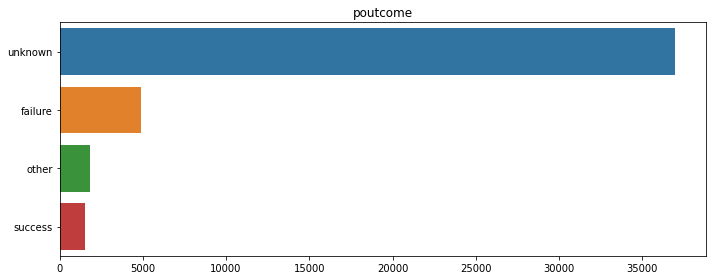

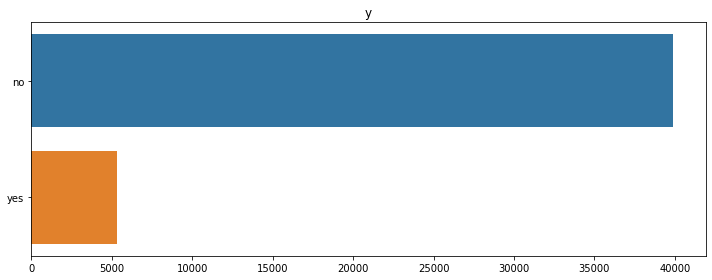

In [ ]:
for col in category_cols:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

#### **Graph Representation of each Categorical variable with respect to Target variable**

In [ ]:
sns.set(rc={'figure.figsize':(20,6)})

In [ ]:
def bar_compare(x,y):
  sns.set_style("whitegrid")
  plt.figure(figsize=(18,6))
  sns.countplot(x=df[x],data=df,hue=df[y])
  plt.title('Count Plot of {x} for target variable Y'.format(x=x.title(),fontsize = 25))
  plt.show()

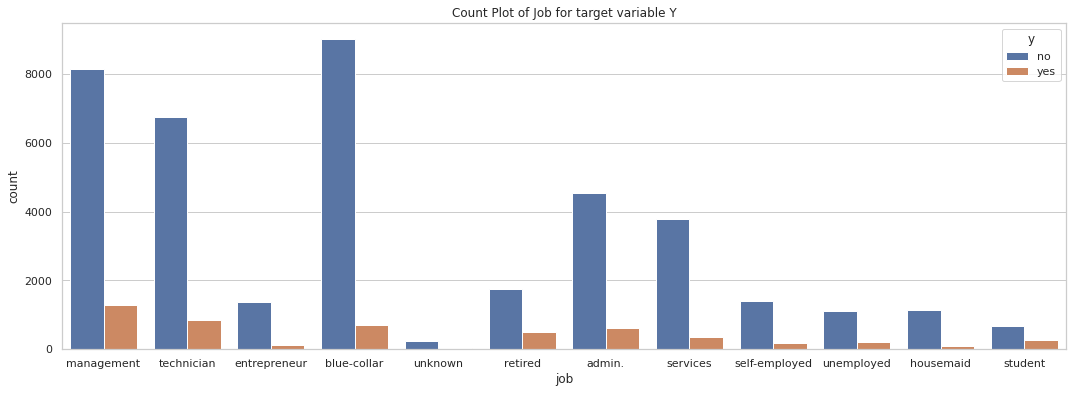

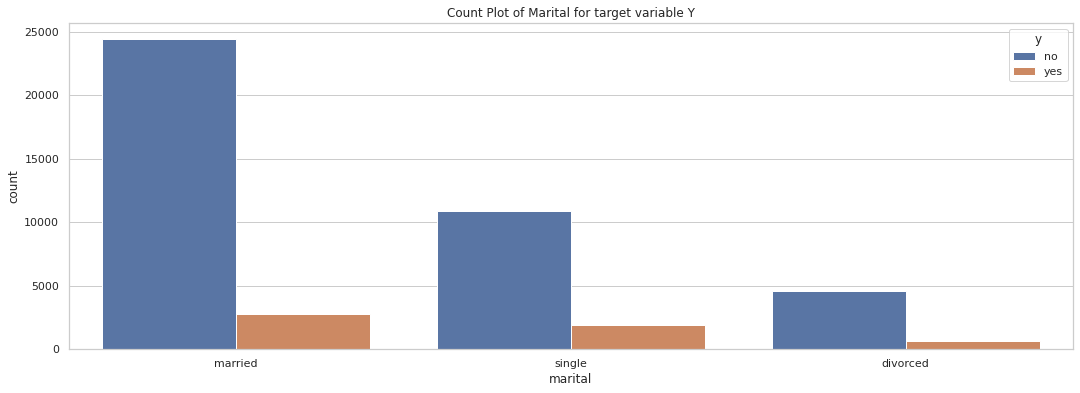

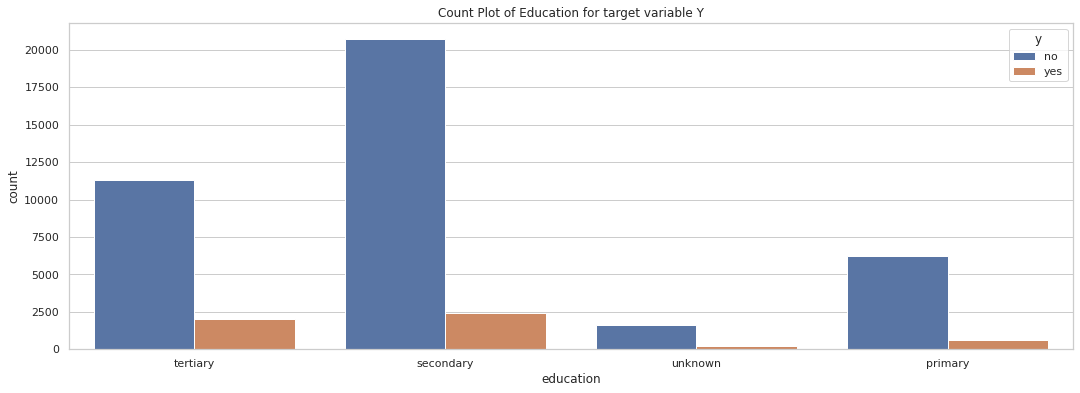

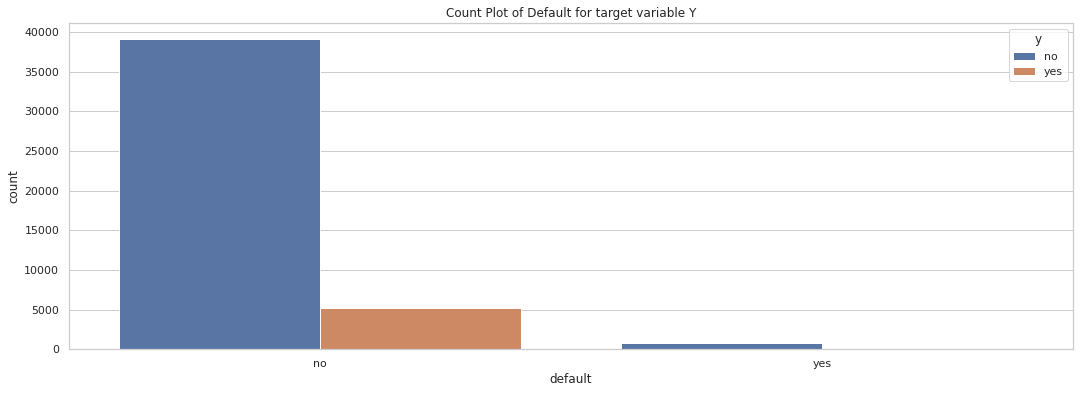

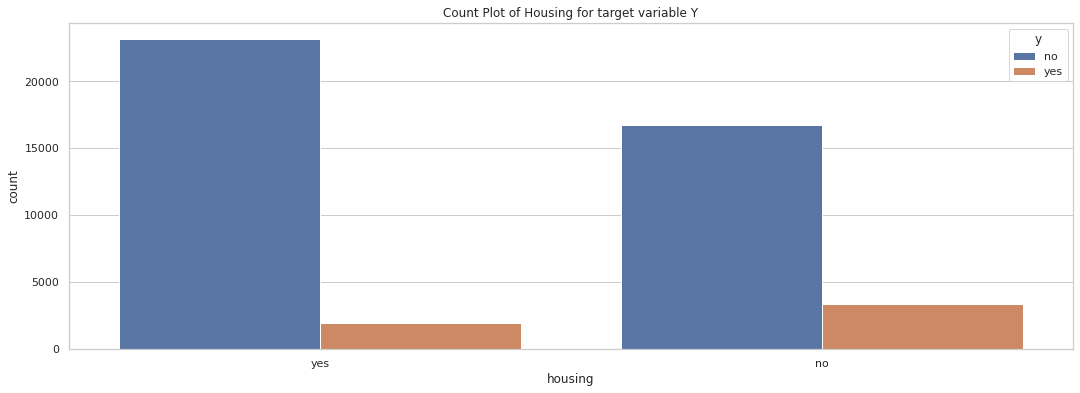

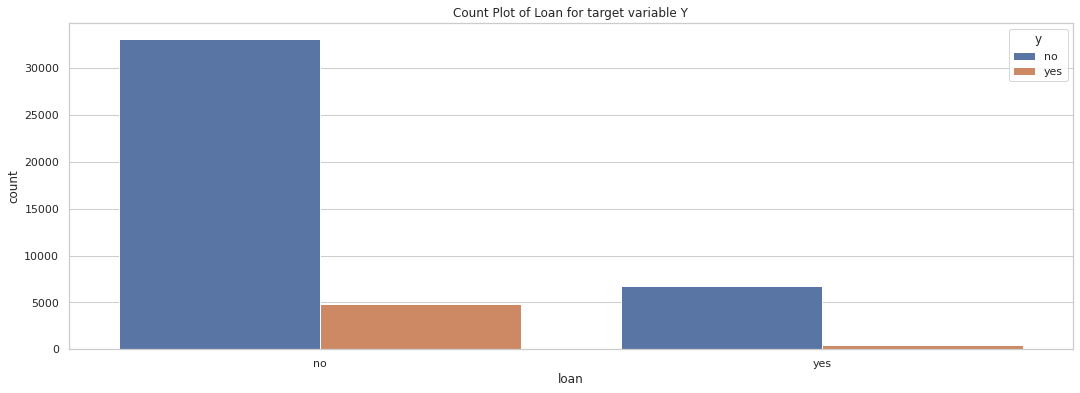

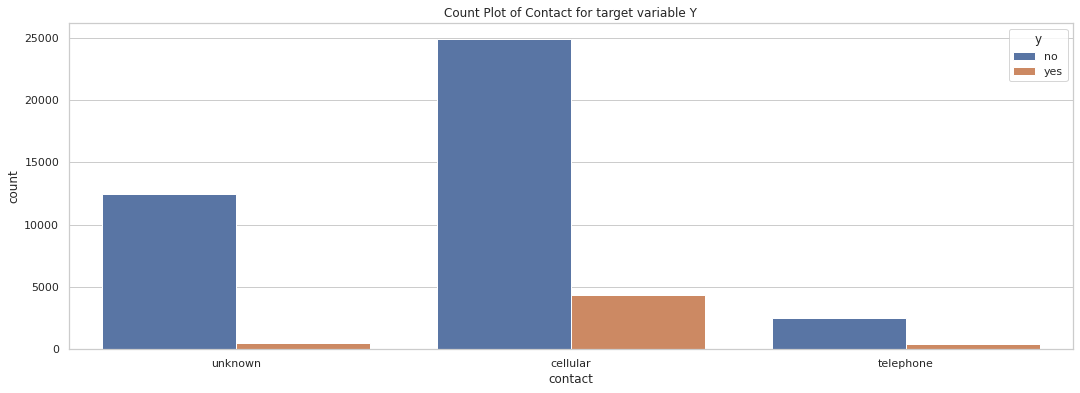

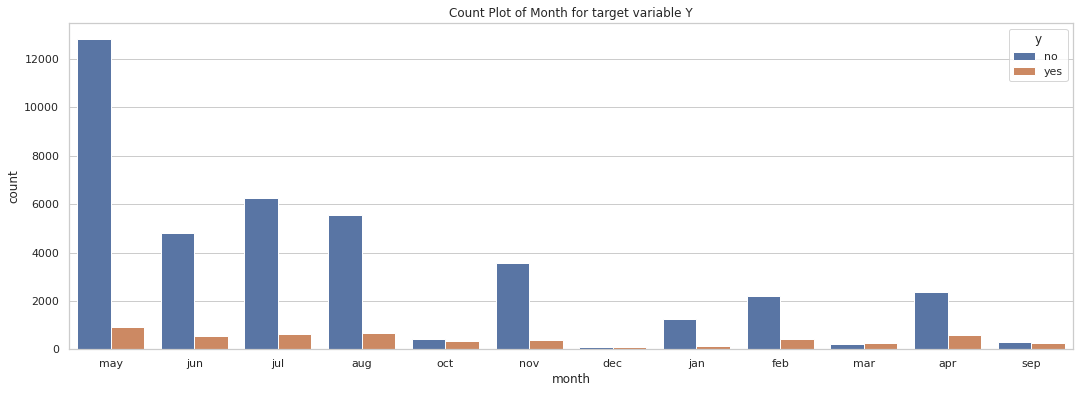

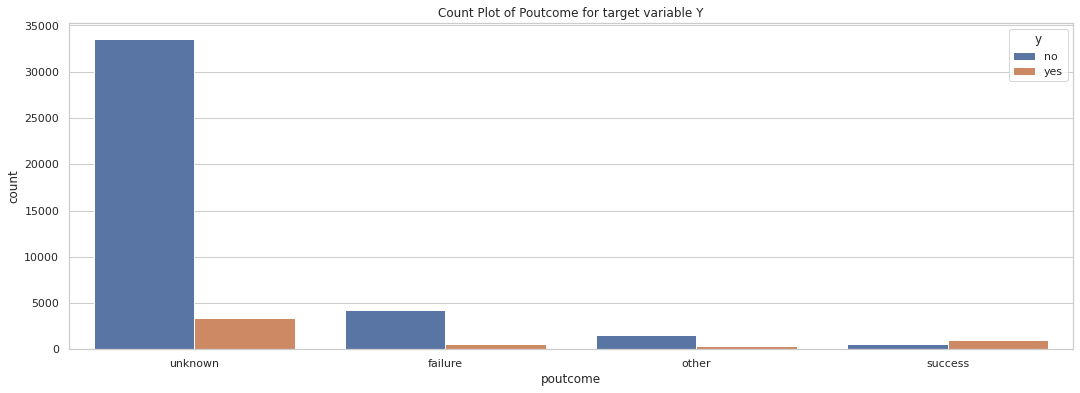

In [ ]:
#ploting countplot for different categorical columns
for col in category_cols[:-1]:
  bar_compare(col,'y')

**From the above plots we can analyze that:**

* Top contacted clients are from job type: 'blue-collar', 'management' & 'technician'.
* Success rate is highest for student.
* Most of the clients contacted have previous outcome as 'unknown'.
* Most of the clients (approx 1/3 of total) are contacted in the month of May but the success rate is only 6.7%.
* March has highest success rate.
* Most of the people are contacted through cellular.
* As seen for default variable, less client are contacted who have loan.
* Very few clients are contacted who are defaulter.
* Most of the people who are contacted have tertiray or secondary education.
* As we can see that married people are more tend to invest in product and have subscribed more in comparison to others.














#### **Age distribution in our dataset**

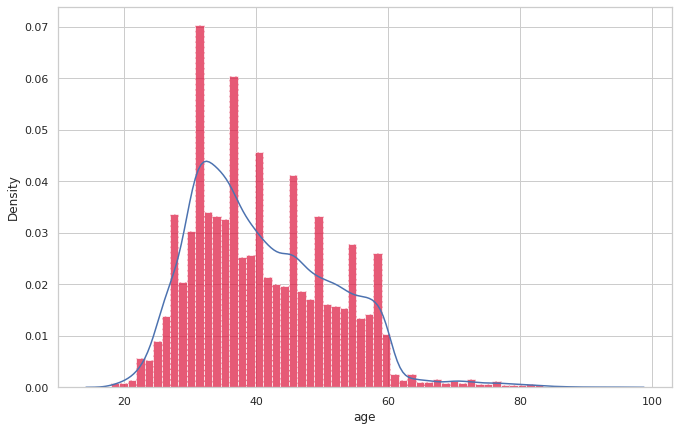

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(df["age"],
                hist_kws = {'color':'#DC143C',
                     'linestyle':'--', 'alpha':0.7}, bins=60); 

**Our dataset have more number of people in late 20s and early 30s**

#### **Pairplot Representation of each variable with respect to Target Variable**

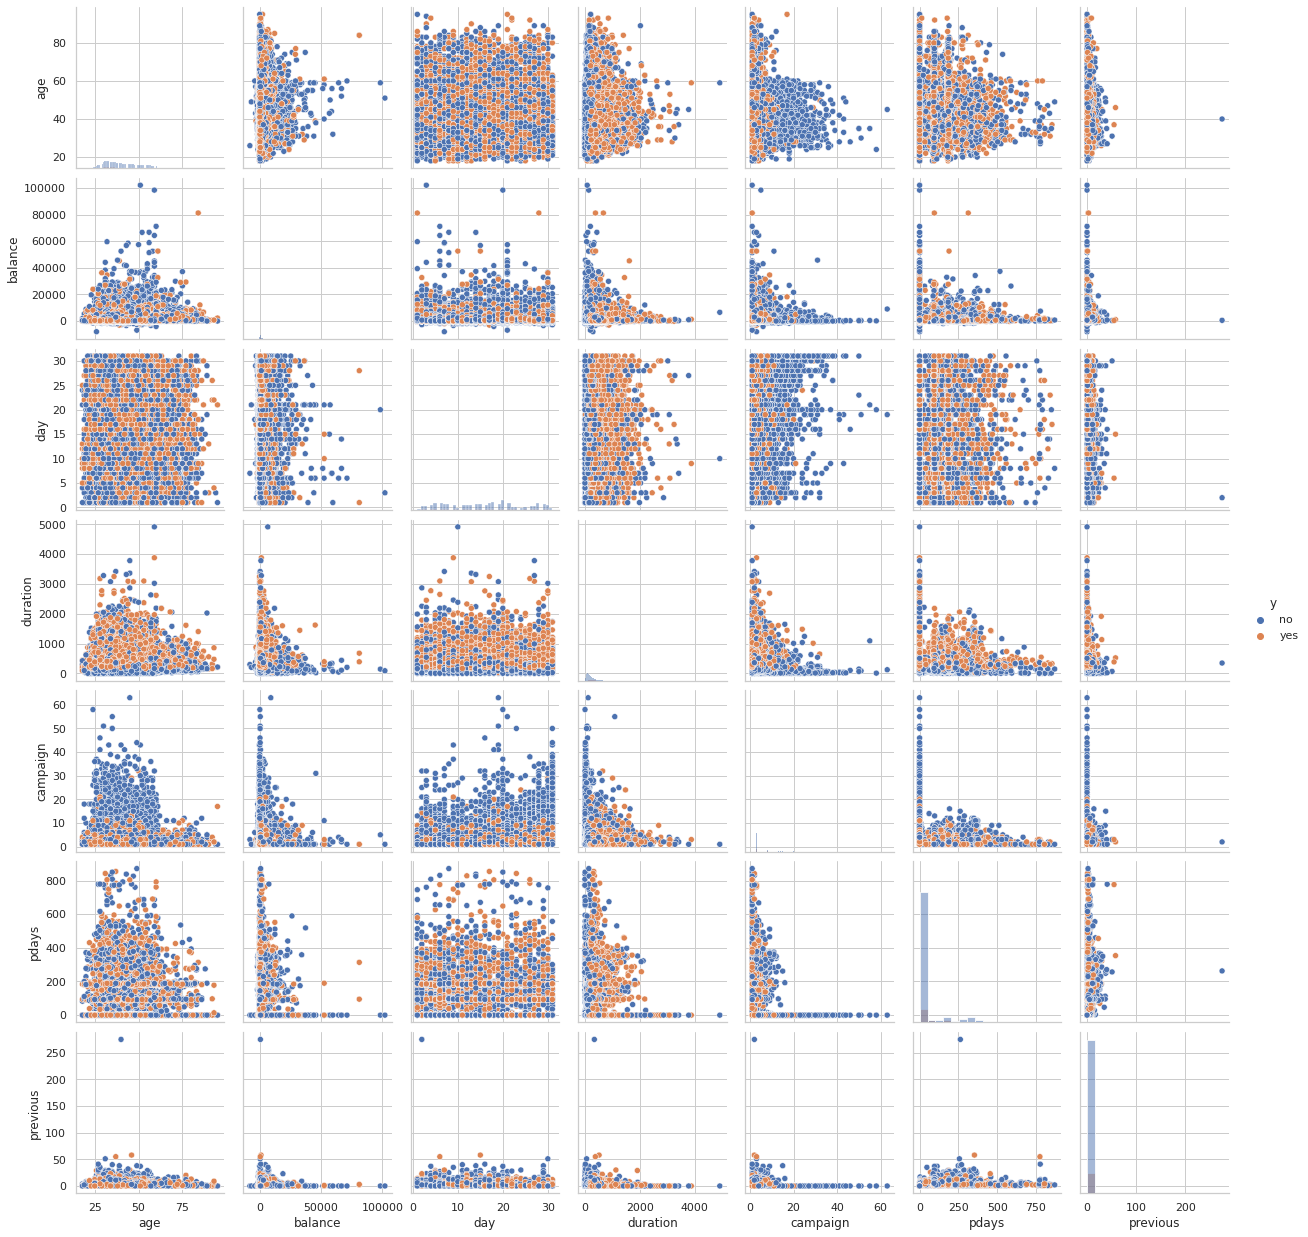

In [ ]:
sns.pairplot(df, hue="y",diag_kind="hist")
plt.show()

__Observation:__  
* For most of the variables our pair plot is overlapping a lot.
* Pair plots of age-campaign and day-campaign are much efficient in distinguishing between different classes with very few overlapes.

In [ ]:
pylab.rcParams['figure.figsize'] = 12,8
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

#### **Scatter plot distribution of age vs balance**

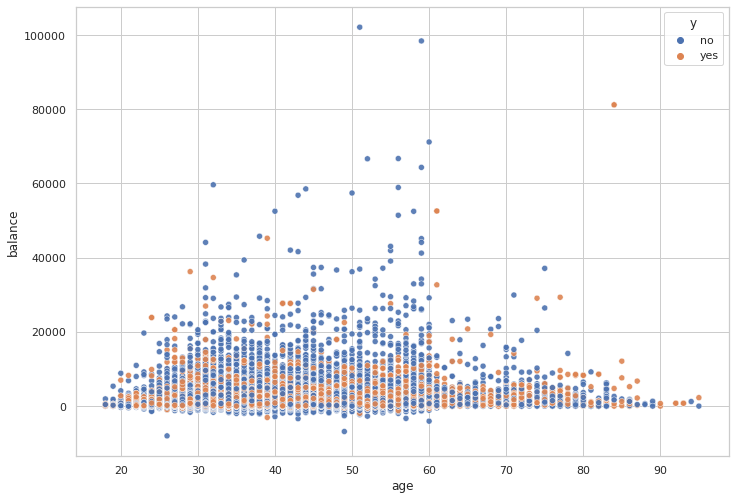

In [ ]:
#visualising age and balance with respect to whether customer has subscribed or not
sns.scatterplot(x="age", y="balance",hue='y',data=df,x_bins=50,y_bins=50,alpha=0.9)

**From above scatter plot we can see 40-60 age group people have subscribed the product. People having high balance have very low subscription rate.This also shows that our dataset have some balance below 0 and we can use this scatter plot to remove some outliers from our data set.**

#### **Scatter plot distribution of pdays vs duration**

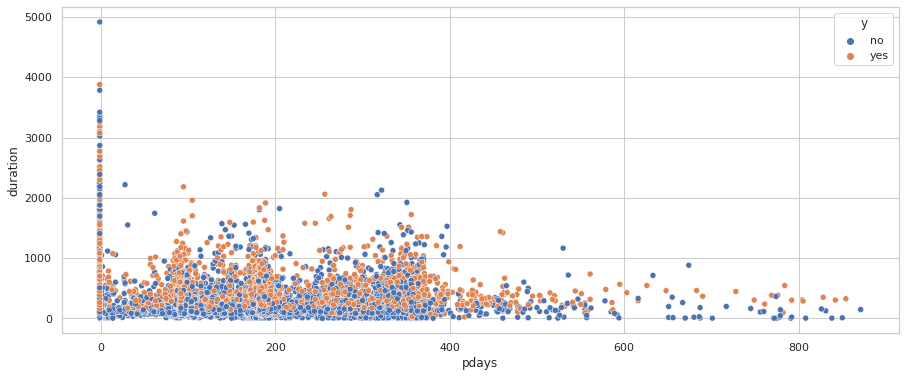

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['pdays'],y=df['duration'],hue=df['y'])
plt.show()

**As scatter plot is depicting that most of the client that had been last contacted falls in 0-400(days)**

#### **Scatter plot distribution of duration vs balance**

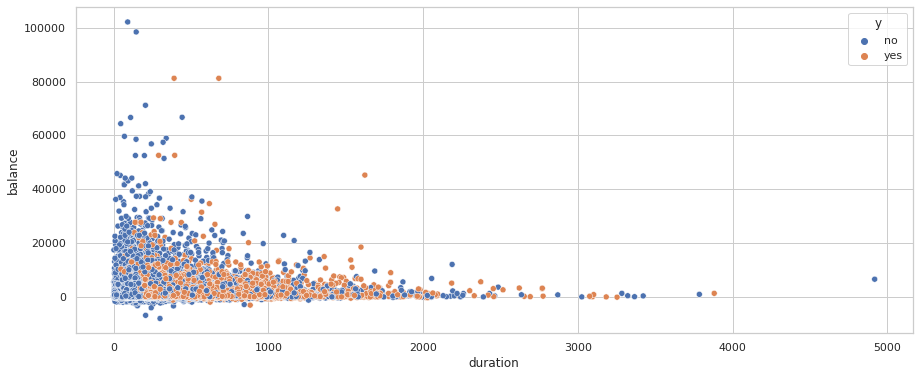

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['duration'],y=df['balance'] ,hue=df['y'])
plt.show()

**Most of the clients who have taken a term deposit do not have very high balance(mostly in between 0-20000)**

In [ ]:
#no.of calls performed in this campaign
df.groupby('y')['campaign'].mean()

y
no     2.846350
yes    2.141047
Name: campaign, dtype: float64

**On average 2 calls leads to success for the clients who have taken a term deposit.**

### **Plotting education, campaign, day and sbscribed by taking 6000 random samples**

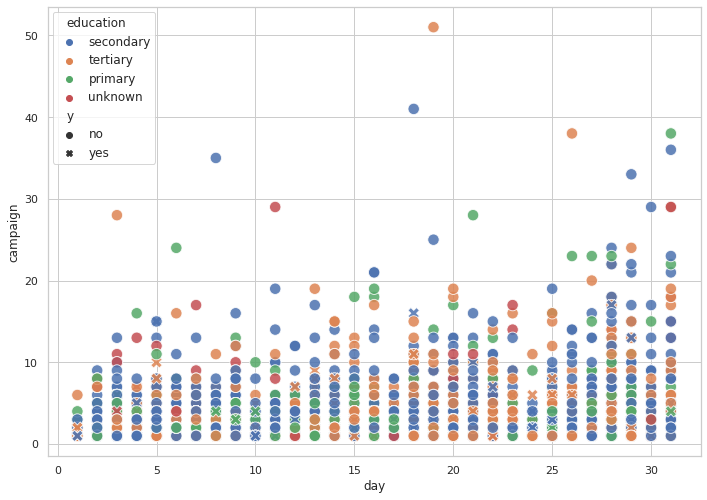

In [ ]:
sample=df.sample(6000)
sns.scatterplot(x="day", y="campaign", hue="education", data=sample,x_bins=50,y_bins=50,alpha=0.85, style="y",s=130 );

**This scatter plot shows that our campaign is more focused on people having secondary education. We also do more campaign on the month end. We need to focus on other education class as well also we need to be more uniform in our campaign accross all days of month.**

#### **Visualising age and balance relation with respect to subscribed**

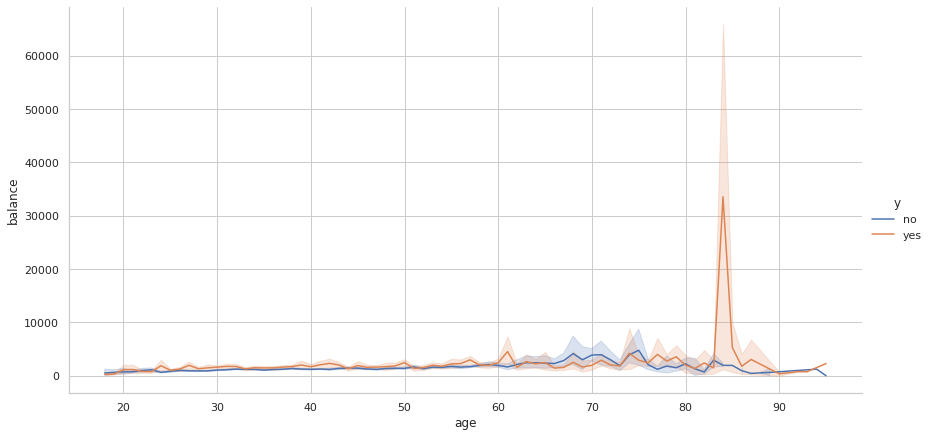

In [ ]:
sns.relplot(x="age", y="balance", kind="line", data=df, hue='y',height=6,aspect=2 );

***We can see that for age 20-60 people with having higher balance  are the ones who subscribe more. But as we move towards higher age we see mixed distribution of subscribing term deposit.*** 

### **Outliers Detection On Features**

**On duration Feature**

Text(0.5, 0, 'y:target variable')

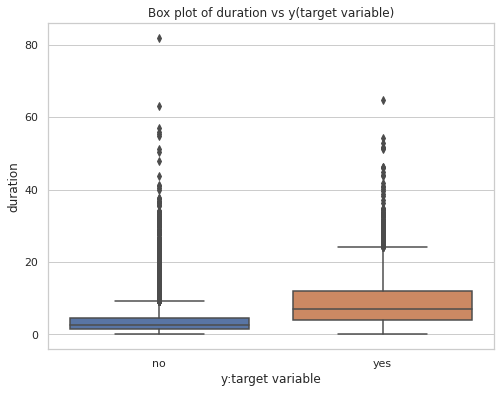

In [ ]:
# converting call duration from seconds to minute
plt.figure(figsize=(8,6))
df['duration'] = df['duration']/60
sns.boxplot(y=df['duration'], x=df['y'])
plt.title('Box plot of duration vs y(target variable)')
plt.xlabel('y:target variable')

**On pdays Feature**

Text(0.5, 0, 'y: target variable')

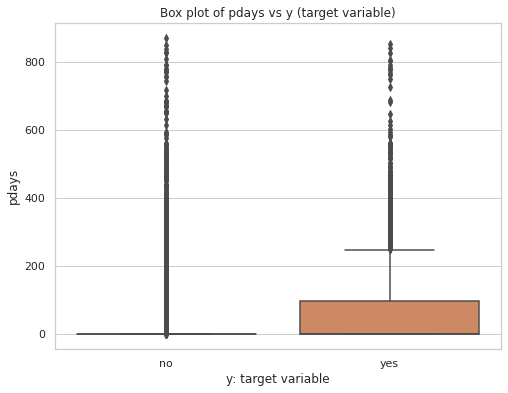

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['pdays'], x=df['y'])
plt.title('Box plot of pdays vs y (target variable)')
plt.xlabel('y: target variable')

**On previous Feature**

Text(0.5, 0, 'y:target variable')

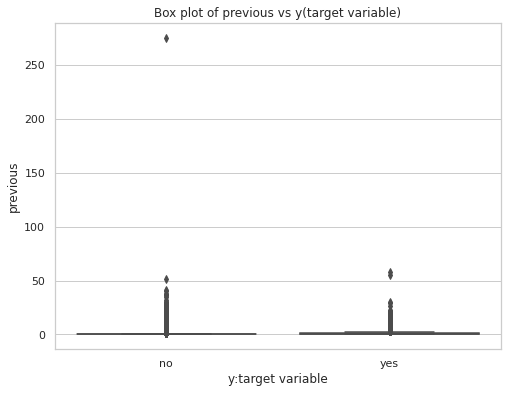

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['previous'], x=df['y'])
plt.title('Box plot of previous vs y(target variable)')
plt.xlabel('y:target variable')

**On age Feature**

Text(0.5, 0, 'y:target variable')

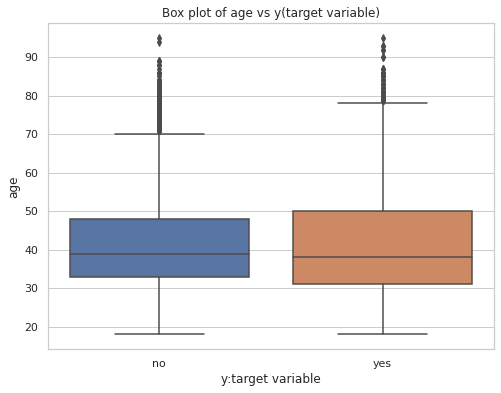

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['age'], x=df['y'])
plt.title('Box plot of age vs y(target variable)')
plt.xlabel('y:target variable')

**As We can see that there are many Outliers in No part As well Yes Part but here our data is Imbalanced so we are keeping this Outliers**

In [ ]:
data=df.copy()

#### **Replacing yes with 1 and No with 0**

In [ ]:
data.replace(to_replace={'y':'yes'}, value=1, inplace=True)
data.replace(to_replace={'y':'no'}, value=0, inplace=True)

#### **Converting categorical variables into numeric**

In [ ]:
# Converting categorical variables into numeric

data['job'] = data['job'].astype('category').cat.codes
data['marital'] = data['marital'].astype('category').cat.codes
data['education'] = data['education'].astype('category').cat.codes
data['contact'] = data['contact'].astype('category').cat.codes
data['poutcome'] = data['poutcome'].astype('category').cat.codes
data['month'] = data['month'].astype('category').cat.codes
data['default'] = data['default'].astype('category').cat.codes
data['loan'] = data['loan'].astype('category').cat.codes
data['housing'] = data['housing'].astype('category').cat.codes

### **Heatmap of the dataset**

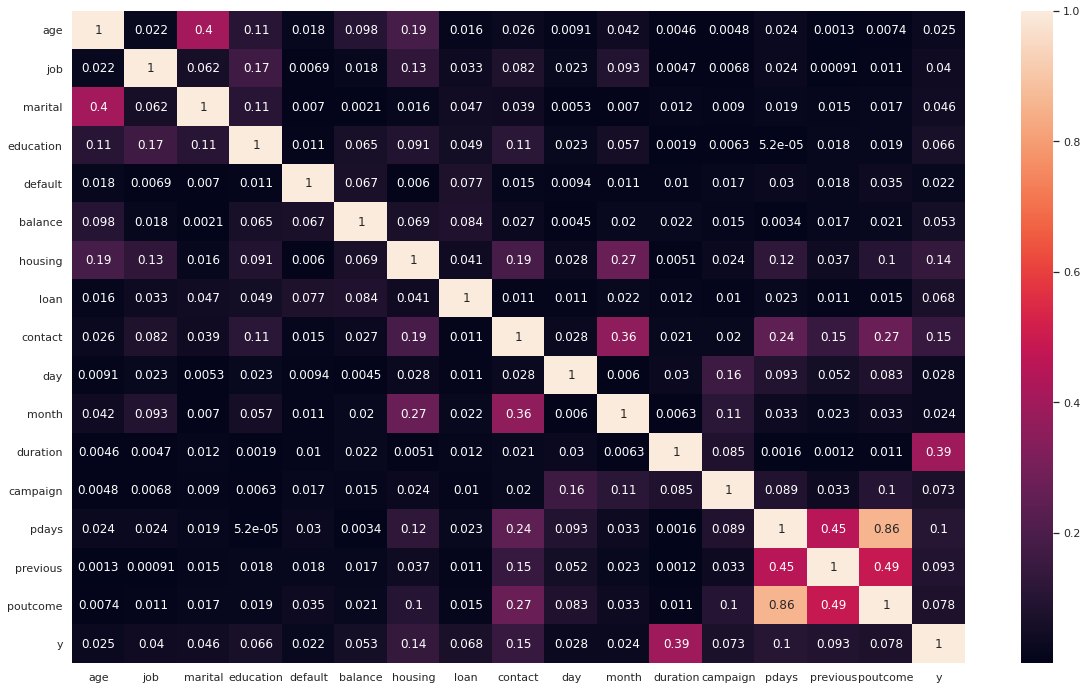

In [ ]:
plt.subplots(figsize=(20,12))
sns.heatmap(data.corr().abs(), annot=True)

**This shows that duration and housing are highly correlated with target variable y (Y/N). Also pdays are also impacting poutcome.**

**Splitting Dataset into Train set and Test set**

In [ ]:
X = data.drop(['y'], axis=1)
y = data['y']

#Splitting the Dataset inro Train Set and Test Set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print('Train data shape {} {}'.format(x_train.shape, y_train.shape))
print('Test data shape {} {}'.format(x_test.shape, y_test.shape))

Train data shape (36168, 16) (36168,)
Test data shape (9043, 16) (9043,)


#### **Applying Decision Tree Classifier**

In [ ]:
clf = DecisionTreeClassifier(class_weight='balanced', min_weight_fraction_leaf = 0.01)

clf.fit(x_train, y_train)
importances = clf.feature_importances_
feature_names = data.drop('y', axis=1).columns
indices = np.argsort(importances)

**Feature Importance**

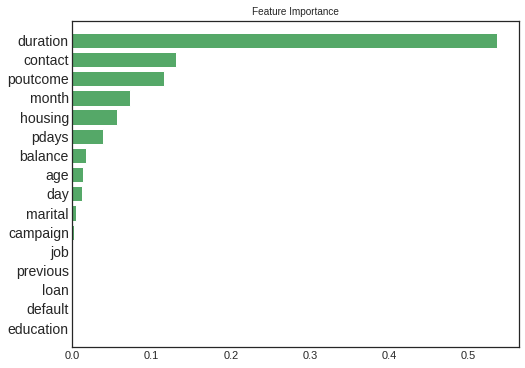

In [ ]:
plt.style.use('seaborn-white')

def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(8,6))
    plt.title("Feature Importance", fontsize=10)
    plt.barh(range(len(indices)), importances[indices], color='g',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

###**Feature Selection**

Important features we are going to consider for machine learning models:
* contact  
* poutcome  
* month  
* housing  
* pdays
* age  
* balance
* day
* marital
* campaign



Here, Target variable is highly influcenced by duration variable so we are not considering it.


#### **Selecting only those features which are important as per feature importance graph shown above**

In [ ]:
data=data[['contact','poutcome','month','housing','pdays','age','balance','day','marital','campaign','y']]

In [ ]:
data.head(2)

,contact,poutcome,month,housing,pdays,age,balance,day,marital,campaign,y
0,2,3,8,1,-1,58,2143,5,1,1,0
1,2,3,8,1,-1,44,29,5,2,1,0


**Splitting Dataset into training and testing**

In [ ]:
X=data.drop(['y'],axis=1)
y = data['y']

#Splitting the Dataset inro Train Set and Test Set
x_train, x_test, y_train, y_test = train_test_split(data.drop(['y'], axis=1), y, test_size=0.20, random_state=42)

### **Applying Logistic Regression**

In [ ]:
#creating hyperparameter grid for Logistic regression
log_reg_grid={'C': np.logspace(-4,4,20),
              'solver':['liblinear']}

#create hyperparameter grid for Random forest
rf_grid= {'n_estimators' : np.arange(10,1000,50),
          'max_depth' : [None, 3,5,10],
          'min_samples_split' : np.arange(2,20,2),
          'min_samples_leaf' : np.arange(1,20,2),
          "max_features": [0.5,1,"sqrt","auto"],
          }

In [ ]:
# dictionary to store accuracy and roc score for each model
score = {}

In [ ]:
#tune logistic regression
np.random.seed(42)
#setting up random search hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(class_weight='balanced'),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                scoring='roc_auc', return_train_score=True, n_jobs=-1)


# fit random search hyperparameter search for logistic regression
rs_log_reg.fit(x_train,y_train)
print('Best parameters:  {}'.format(rs_log_reg.best_params_))
print('Best score: {}'.format(rs_log_reg.best_score_))

Best parameters:  {'solver': 'liblinear', 'C': 0.012742749857031334}
Best score: 0.7132457631863106


**************************************************
Train AUC: 0.714
Test AUC: 0.704
**************************************************
Train Accuracy: 0.622
Test Accuracy: 0.615


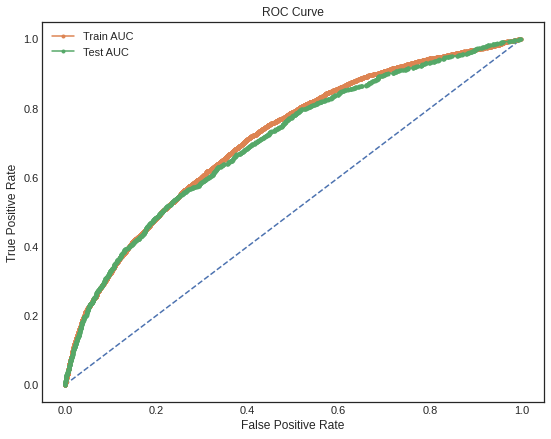

In [ ]:
from sklearn.metrics import log_loss

model = LogisticRegression(C=0.012742749857031334, solver='liblinear', n_jobs=-1,class_weight='balanced')
model.fit(x_train, y_train)
y_probs_train = model.predict_proba(x_train)
y_probs_test = model.predict_proba(x_test)
y_predicted_train = model.predict(x_train)
y_predicted_test = model.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
f1_s=f1_score(y_test,y_predicted_test)
p_score=precision_score(y_test,y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Logistic Regression'] = [test_auc, test_acc,f1_s,p_score]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
print(classification_report(y_test,y_predicted_test))

              precision    recall  f1-score   support

           0       0.93      0.61      0.73      7952
           1       0.19      0.68      0.30      1091

    accuracy                           0.61      9043
   macro avg       0.56      0.64      0.52      9043
weighted avg       0.84      0.61      0.68      9043



## **Performing Undersampling On Dataset**

In [ ]:
Yes = data[data['y']==1]
No = data[data['y']==0]

In [ ]:
print(Yes.shape,No.shape)

(5289, 11) (39922, 11)


In [ ]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss(random_state=42)
X_res,y_res=nm.fit_sample(X,y)

In [ ]:
X_res.shape,y_res.shape

((10578, 10), (10578,))

In [ ]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 39922, 1: 5289})
Resampled dataset shape Counter({0: 5289, 1: 5289})


In [ ]:
#Splitting the Dataset inro Train Set and Test Set
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

####**Scaling dataset**

In [ ]:
#scaling our dataset for fit

sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

## **Logistic Regression (Under Sampling)**

In [ ]:
parameters = {'C':[(10**i)*x for i in range(-4, 1) for x in [1,3,5]]}

model = LogisticRegression(class_weight='balanced')
clf = RandomizedSearchCV(model, parameters, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(x_train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'C': 5}
Best score: 0.9082915684316337


**************************************************
Train AUC: 0.908
Test AUC: 0.893
**************************************************
Train Accuracy: 0.855
Test Accuracy: 0.854


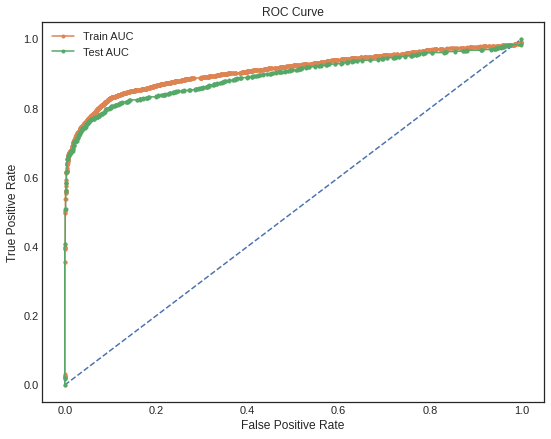

In [ ]:
from sklearn.metrics import log_loss

model = LogisticRegression(C=0.5, n_jobs=-1)
model.fit(x_train, y_train)
y_probs_train = model.predict_proba(x_train)
y_probs_test = model.predict_proba(x_test)
y_predicted_train = model.predict(x_train)
y_predicted_test = model.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
f1_s= f1_score(y_test,y_predicted_test)
p_score=precision_score(y_test,y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Logistic Regression (Under sampling)'] = [test_auc, test_acc,f1_s,p_score]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
print(classification_report(y_test,y_predicted_test))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1092
           1       0.95      0.74      0.83      1024

    accuracy                           0.85      2116
   macro avg       0.87      0.85      0.85      2116
weighted avg       0.87      0.85      0.85      2116



### **Random Forest Classifier (Under Sampling)****

In [ ]:
params = {'n_estimators':[75, 100, 250, 500], 'max_depth':[3, 5, 10, 15, 25]}
model = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
clf = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1, return_train_score=True)
clf.fit(x_train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'n_estimators': 500, 'max_depth': 15}
Best score: 0.9542330261739848


**************************************************
Train AUC: 0.992
Test AUC: 0.949
**************************************************
Train Accuracy: 0.958
Test Accuracy: 0.889


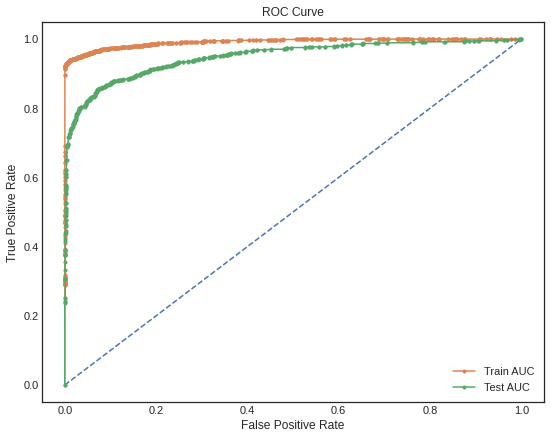

In [ ]:
model1 = RandomForestClassifier(n_estimators=500, max_depth=15, n_jobs=-1)
model1.fit(x_train, y_train)
y_probs_train = model1.predict_proba(x_train)
y_probs_test = model1.predict_proba(x_test)
y_predicted_train = model1.predict(x_train)
y_predicted_test = model1.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
f1_s= f1_score(y_test,y_predicted_test)
p_score=precision_score(y_test,y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Random Forest (Under sampling)'] = [test_auc, test_acc,f1_s,p_score]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
print(classification_report(y_test,y_predicted_test))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1092
           1       0.92      0.84      0.88      1024

    accuracy                           0.89      2116
   macro avg       0.89      0.89      0.89      2116
weighted avg       0.89      0.89      0.89      2116



### **Fixing our unbalanced data set with oversampling and applying a model**

In [ ]:
os_us = SMOTETomek(ratio=0.5)
X_train_res1, y_train_res1 = os_us.fit_sample(X, y)

In [ ]:
X_train_res1.shape,y_train_res1.shape

((57393, 10), (57393,))

In [ ]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res1)))

Original dataset shape Counter({0: 39922, 1: 5289})
Resampled dataset shape Counter({0: 38677, 1: 18716})


In [ ]:
#Splitting the Dataset inro Train Set and Test Set
x_train, x_test, y_train, y_test = train_test_split(X_train_res1, y_train_res1, test_size=0.20, random_state=42)

In [ ]:
#scaling our dataset for fit

sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

### **1. Random Forest Classifier (Over Sampling)****

In [ ]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
#RandomForest Classifier implmentation on our balanced dataset with few hyperparameters 
rfc = RandomForestClassifier(n_estimators = 200, n_jobs=2, random_state = 12)#criterion = entopy,gini
rfc.fit(x_train, y_train)
rfcpred = rfc.predict(x_test)
RFCCV = (cross_val_score(rfc, x_train, y_train, cv=k_fold, n_jobs=2, scoring = 'accuracy').mean())

In [ ]:
#displaying score 
models = pd.DataFrame({
                'Models': ['Random Forest Classifier'],
                'Score':  [RFCCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Random Forest Classifier,0.877118


In [ ]:
#printing confusion matrix
print('RFC Confusion Matrix\n', confusion_matrix(y_test, rfcpred))

RFC Confusion Matrix
 [[7118  626]
 [ 767 2968]]


In [ ]:
#printing classification report
print('RFC Reports\n',classification_report(y_test, rfcpred))

RFC Reports
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      7744
           1       0.83      0.79      0.81      3735

    accuracy                           0.88     11479
   macro avg       0.86      0.86      0.86     11479
weighted avg       0.88      0.88      0.88     11479



**************************************************
Train AUC: 1.000
Test AUC: 0.929
**************************************************
Train Accuracy: 1.000
Test Accuracy: 0.879


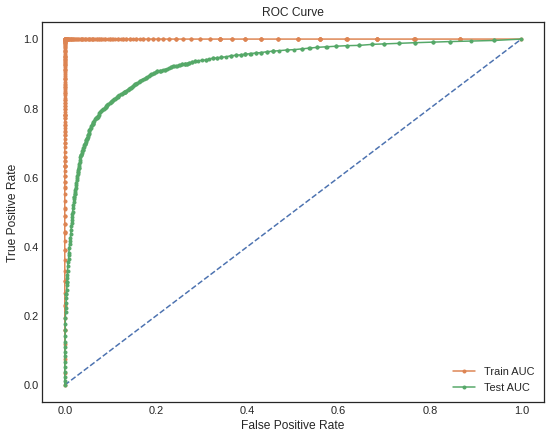

In [ ]:
y_probs_train = rfc.predict_proba(x_train)
y_probs_test = rfc.predict_proba(x_test)
y_predicted_train = rfc.predict(x_train)
y_predicted_test = rfc.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
f1_s= f1_score(y_test,y_predicted_test)
p_score=precision_score(y_test,y_predicted_test)

print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Random Forest (Over sampling)'] = [test_auc, test_acc,f1_s,p_score]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
print(classification_report(y_test,y_predicted_test))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7744
           1       0.83      0.79      0.81      3735

    accuracy                           0.88     11479
   macro avg       0.86      0.86      0.86     11479
weighted avg       0.88      0.88      0.88     11479



###**2. KNN (Over Sampling)**

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1)
k_range = list(range(5, 31))
param_distributions = dict(n_neighbors=k_range)
clf = RandomizedSearchCV(knn, param_distributions, cv=10, scoring='roc_auc', random_state=42, n_jobs=-1, return_train_score=True)
clf.fit(x_train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'n_neighbors': 10}
Best score: 0.8694562721735659


**************************************************
Train AUC: 0.923
Test AUC: 0.873
**************************************************
Train Accuracy: 0.846
Test Accuracy: 0.822


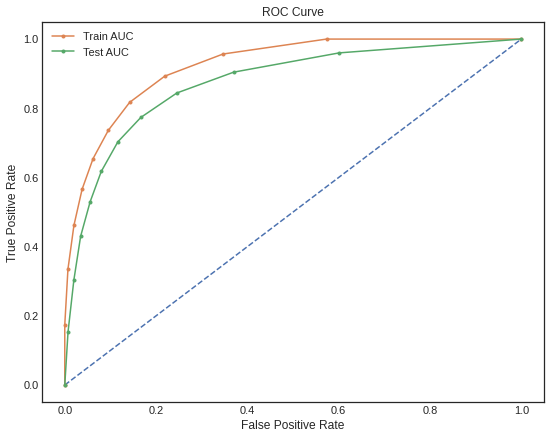

In [ ]:
model = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
model.fit(x_train, y_train)
y_probs_train = model.predict_proba(x_train)
y_probs_test = model.predict_proba(x_test)
y_predicted_train = model.predict(x_train)
y_predicted_test = model.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
f1_s= f1_score(y_test,y_predicted_test)
p_score=precision_score(y_test,y_predicted_test)

print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['KNN (Over sampling)'] = [test_auc, test_acc,f1_s,p_score]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
print(classification_report(y_test,y_predicted_test))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      7744
           1       0.79      0.62      0.69      3735

    accuracy                           0.82     11479
   macro avg       0.81      0.77      0.78     11479
weighted avg       0.82      0.82      0.82     11479



### **XGBoost Model (Over Sampling)**

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  5.7min finished


**************************************************
Train AUC: 0.942
Test AUC: 0.909
**************************************************
Train Accuracy: 0.883
Test Accuracy: 0.861


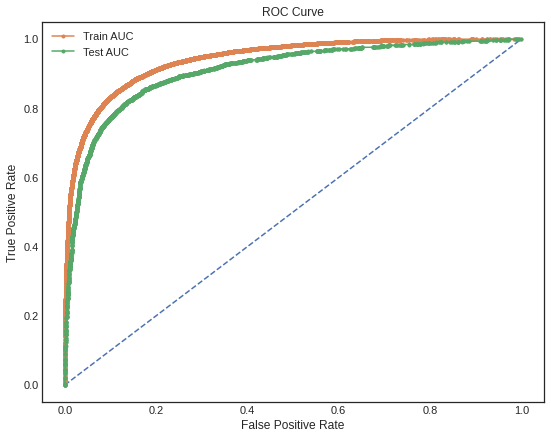

In [ ]:
#using XGBoost in RandomizedSearch to get best result

folds = 3
param_comb = 5
prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}    
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

xgb=XGBClassifier()

#xgb.fit(X_train, y_train)
random_search = RandomizedSearchCV(xgb,param_distributions= prams ,n_iter=param_comb, scoring='roc_auc', n_jobs=4, verbose=3, random_state=1001 )
random_search.fit(x_train, y_train)
y_probs_train = random_search.predict_proba(x_train)
y_probs_test = random_search.predict_proba(x_test)
y_predicted_train = random_search.predict(x_train)
y_predicted_test = random_search.predict(x_test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

# calculate AUC and Accuracy
plt.figure(figsize=(9,7))
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
f1_s= f1_score(y_test,y_predicted_test)
p_score=precision_score(y_test,y_predicted_test)

print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['XGBoost (Over sampling)'] = [test_auc, test_acc,f1_s,p_score]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
print(classification_report(y_test,y_predicted_test))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7744
           1       0.82      0.73      0.77      3735

    accuracy                           0.86     11479
   macro avg       0.85      0.83      0.84     11479
weighted avg       0.86      0.86      0.86     11479



In [ ]:
score

{'KNN (Over sampling)': [0.8730657824134002,
  0.821587246275808,
  0.6924924924924926,
  0.7883760683760683],
 'Logistic Regression': [0.7044564591951341,
  0.6147296251244057,
  0.29927594529364443,
  0.19170316928626643],
 'Logistic Regression (Under sampling)': [0.8932846125228937,
  0.8544423440453687,
  0.8311403508771931,
  0.9475],
 'Random Forest (Over sampling)': [0.9294634979311184,
  0.8786479658506838,
  0.8099331423113657,
  0.8258208124652198],
 'Random Forest (Under sampling)': [0.9488064832303114,
  0.8889413988657845,
  0.8800408371618172,
  0.9219251336898395],
 'XGBoost (Over sampling)': [0.9094144311405401,
  0.861050614164997,
  0.7734696776026132,
  0.8236539624924379]}

**Random Forest(Under Sampling ) Model performing good among all models so considering it for the feature importance graph.**

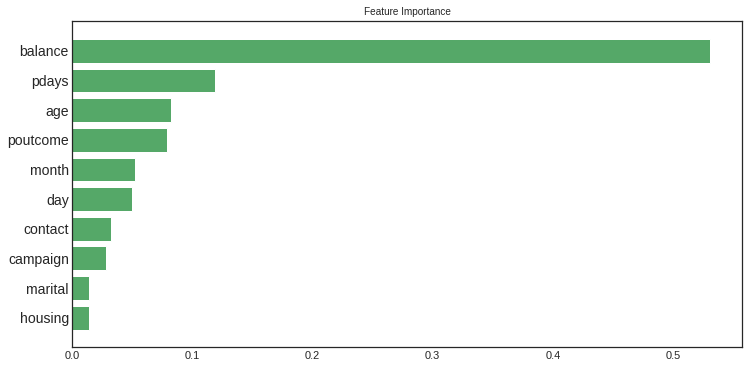

In [ ]:
importances = model1.feature_importances_
feature_names = data.drop('y', axis=1).columns
indices = np.argsort(importances)

plt.style.use('seaborn-white')

def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Feature Importance", fontsize=10)
    plt.barh(range(len(indices)), importances[indices], color='g',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

# **Conclusion**

* It was a great learning experience working on a Bank dataset.
* Our dataset consist of categorical and numerical features.  
* We have 17 independent features, out of these only half of them are important.  
* 'balance' is the most important feature while 'education' is the least important feature.
* Month of May have seen the highest number of clients contacted but have the least success rate. Highest success rate is observed for end month of the financial year as well as the calendar year. So one can say that our dataset have some kind of seasonality.  
* Different machine learning models are trained and tested on the dataset. Out of those Random Forest and XGBoost performs best. Logistic Regression is also an important model as it results in high AUC score.
* Different models are summarized in table below. 

In [ ]:
print('***************  Comparison of different models  ****************')
table = PrettyTable(['Model', 'Test AUC', 'Test Accuracy','F1_score','Precision'])
for item in score.items():
    table.add_row([item[0], item[1][0], item[1][1], item[1][2], item[1][3]])
print(table)

***************  Comparison of different models  ****************
+--------------------------------------+--------------------+--------------------+---------------------+---------------------+
|                Model                 |      Test AUC      |   Test Accuracy    |       F1_score      |      Precision      |
+--------------------------------------+--------------------+--------------------+---------------------+---------------------+
|         Logistic Regression          | 0.7044564591951341 | 0.6147296251244057 | 0.29927594529364443 | 0.19170316928626643 |
| Logistic Regression (Under sampling) | 0.8932846125228937 | 0.8544423440453687 |  0.8311403508771931 |        0.9475       |
|    Random Forest (Under sampling)    | 0.9488064832303114 | 0.8889413988657845 |  0.8800408371618172 |  0.9219251336898395 |
|    Random Forest (Over sampling)     | 0.9294634979311184 | 0.8786479658506838 |  0.8099331423113657 |  0.8258208124652198 |
|         KNN (Over sampling)          | 0.87